In [1]:
from datetime import datetime, timedelta
from pandas import DataFrame 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('C:\\Users\\Steph\\GeekBrains\\seattle_pet_licenses.csv', delimiter = ',')
data

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
0,Ozzy,2005-03-29T00:00:00.000,130651.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98104
1,Jack,2009-12-23T00:00:00.000,898148.0,"Schnauzer, Miniature","Terrier, Rat",Dog,98107
2,Ginger,2006-01-20T00:00:00.000,29654.0,"Retriever, Golden","Retriever, Labrador",Dog,98117
3,Pepper,2006-02-07T00:00:00.000,75432.0,Manx,Mix,Cat,98103
4,Addy,2006-08-04T00:00:00.000,729899.0,"Retriever, Golden",NaN,Dog,98105
...,...,...,...,...,...,...,...
66037,Lily,2016-12-27T00:00:00.000,NaN,Domestic Shorthair,Mix,Cat,98117
66038,Ellie,2016-11-29T00:00:00.000,NaN,German Shepherd,Mix,Dog,98105
66039,Sammy,2016-12-05T00:00:00.000,NaN,Terrier,Maltese,Dog,98105
66040,Buddy,2016-12-06T00:00:00.000,NaN,Bullmastiff,Mix,Dog,98105


In [2]:
data.drop(['license_number','zip_code'], axis = 1 , inplace = True)
data

,animal_s_name,license_issue_date,primary_breed,secondary_breed,species
0,Ozzy,2005-03-29T00:00:00.000,"Dachshund, Standard Smooth Haired",NaN,Dog
1,Jack,2009-12-23T00:00:00.000,"Schnauzer, Miniature","Terrier, Rat",Dog
2,Ginger,2006-01-20T00:00:00.000,"Retriever, Golden","Retriever, Labrador",Dog
3,Pepper,2006-02-07T00:00:00.000,Manx,Mix,Cat
4,Addy,2006-08-04T00:00:00.000,"Retriever, Golden",NaN,Dog
...,...,...,...,...,...
66037,Lily,2016-12-27T00:00:00.000,Domestic Shorthair,Mix,Cat
66038,Ellie,2016-11-29T00:00:00.000,German Shepherd,Mix,Dog
66039,Sammy,2016-12-05T00:00:00.000,Terrier,Maltese,Dog
66040,Buddy,2016-12-06T00:00:00.000,Bullmastiff,Mix,Dog


In [3]:
data_d = data.drop(['secondary_breed','primary_breed'], axis = 1)
data_d

,animal_s_name,license_issue_date,species
0,Ozzy,2005-03-29T00:00:00.000,Dog
1,Jack,2009-12-23T00:00:00.000,Dog
2,Ginger,2006-01-20T00:00:00.000,Dog
3,Pepper,2006-02-07T00:00:00.000,Cat
4,Addy,2006-08-04T00:00:00.000,Dog
...,...,...,...
66037,Lily,2016-12-27T00:00:00.000,Cat
66038,Ellie,2016-11-29T00:00:00.000,Dog
66039,Sammy,2016-12-05T00:00:00.000,Dog
66040,Buddy,2016-12-06T00:00:00.000,Dog


In [4]:
data_d.rename(columns={'animal_s_name':'name','license_issue_date':'date'},inplace=True)
data_d

,name,date,species
0,Ozzy,2005-03-29T00:00:00.000,Dog
1,Jack,2009-12-23T00:00:00.000,Dog
2,Ginger,2006-01-20T00:00:00.000,Dog
3,Pepper,2006-02-07T00:00:00.000,Cat
4,Addy,2006-08-04T00:00:00.000,Dog
...,...,...,...
66037,Lily,2016-12-27T00:00:00.000,Cat
66038,Ellie,2016-11-29T00:00:00.000,Dog
66039,Sammy,2016-12-05T00:00:00.000,Dog
66040,Buddy,2016-12-06T00:00:00.000,Dog


In [5]:
data_d['date'] = pd.to_datetime(data_d['date'], format="%Y/%m/%d")
# data_d = data_d.sort_values('date')
data_d


,name,date,species
0,Ozzy,2005-03-29,Dog
1,Jack,2009-12-23,Dog
2,Ginger,2006-01-20,Dog
3,Pepper,2006-02-07,Cat
4,Addy,2006-08-04,Dog
...,...,...,...
66037,Lily,2016-12-27,Cat
66038,Ellie,2016-11-29,Dog
66039,Sammy,2016-12-05,Dog
66040,Buddy,2016-12-06,Dog


,count
species,
Cat,22915
Dog,43076
Livestock,51


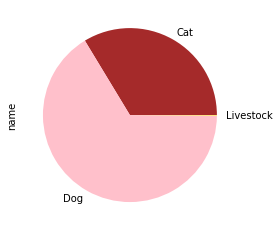

In [6]:
data_dc = data_d.groupby(['species'],).count()


colors = ['brown', 'pink', 'yellow']
data_dc['name'].plot(kind='pie',colors=colors)
data_dc.drop(['name'],axis=1,inplace = True)
data_dc.rename(columns={'date':'count'})

AttributeError: 'Series' object has no attribute 'crosstab'

In [7]:
data_d['date'] = pd.qcut(data_d['date'], q=10)
# data_d['date'] = data_d2['date']
data_d

,name,date,species
0,Ozzy,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
1,Jack,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
2,Ginger,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
3,Pepper,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Cat
4,Addy,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
...,...,...,...
66037,Lily,"(2016-10-25, 2016-12-31]",Cat
66038,Ellie,"(2016-10-25, 2016-12-31]",Dog
66039,Sammy,"(2016-10-25, 2016-12-31]",Dog
66040,Buddy,"(2016-10-25, 2016-12-31]",Dog


In [8]:
data_d


,name,date,species
0,Ozzy,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
1,Jack,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
2,Ginger,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
3,Pepper,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Cat
4,Addy,"(2005-03-28 23:59:59.999999999, 2015-02-07]",Dog
...,...,...,...
66037,Lily,"(2016-10-25, 2016-12-31]",Cat
66038,Ellie,"(2016-10-25, 2016-12-31]",Dog
66039,Sammy,"(2016-10-25, 2016-12-31]",Dog
66040,Buddy,"(2016-10-25, 2016-12-31]",Dog


In [9]:
gg = data_d.reset_index()

In [10]:
gg.columns

Index(['index', 'name', 'date', 'species'], dtype='object')

In [32]:
gg2 = gg.pivot_table(index=['date'], columns=[ 'species'], values='name', aggfunc='count')
gg2


species,Cat,Dog,Livestock
date,,,
"(2005-03-28 23:59:59.999999999, 2015-02-07]",2319,4125,0
"(2015-02-07, 2015-05-12]",2121,4570,2
"(2015-05-12, 2015-07-30]",2098,4200,3
"(2015-07-30, 2015-11-10]",2395,4119,4
"(2015-11-10, 2016-01-05]",2314,4070,9
"(2016-01-05, 2016-03-18]",2031,4331,6
"(2016-03-18, 2016-06-07]",2024,4609,6
"(2016-06-07, 2016-08-24]",2071,4310,8
"(2016-08-24, 2016-10-25]",2251,4422,7


In [33]:

for i in range(1,len(gg2["Cat"])):

    
    gg2["Cat"][i] =gg2["Cat"][i]+gg2["Cat"][i-1]
    print(gg2["Cat"][i])

gg2





4440
6538
8933
11247
13278
15302
17373
19624
21776


species,Cat,Dog,Livestock
date,,,
"(2005-03-28 23:59:59.999999999, 2015-02-07]",2319,4125,0
"(2015-02-07, 2015-05-12]",4440,4570,2
"(2015-05-12, 2015-07-30]",6538,4200,3
"(2015-07-30, 2015-11-10]",8933,4119,4
"(2015-11-10, 2016-01-05]",11247,4070,9
"(2016-01-05, 2016-03-18]",13278,4331,6
"(2016-03-18, 2016-06-07]",15302,4609,6
"(2016-06-07, 2016-08-24]",17373,4310,8
"(2016-08-24, 2016-10-25]",19624,4422,7


In [34]:
for i in range(1,len(gg2["Dog"])):

    
    gg2["Dog"][i] =gg2["Dog"][i]+gg2["Dog"][i-1]
    print(gg2["Dog"][i])

gg2

8695
12895
17014
21084
25415
30024
34334
38756
42858


species,Cat,Dog,Livestock
date,,,
"(2005-03-28 23:59:59.999999999, 2015-02-07]",2319,4125,0
"(2015-02-07, 2015-05-12]",4440,8695,2
"(2015-05-12, 2015-07-30]",6538,12895,3
"(2015-07-30, 2015-11-10]",8933,17014,4
"(2015-11-10, 2016-01-05]",11247,21084,9
"(2016-01-05, 2016-03-18]",13278,25415,6
"(2016-03-18, 2016-06-07]",15302,30024,6
"(2016-06-07, 2016-08-24]",17373,34334,8
"(2016-08-24, 2016-10-25]",19624,38756,7


In [35]:
for q in range(1,len(gg2["Livestock"])):

    
    gg2["Livestock"][q] =gg2["Livestock"][q]+gg2["Livestock"][q-1]
    print(gg2["Livestock"][q])

gg2

2
5
9
18
24
30
38
45
51


species,Cat,Dog,Livestock
date,,,
"(2005-03-28 23:59:59.999999999, 2015-02-07]",2319,4125,0
"(2015-02-07, 2015-05-12]",4440,8695,2
"(2015-05-12, 2015-07-30]",6538,12895,5
"(2015-07-30, 2015-11-10]",8933,17014,9
"(2015-11-10, 2016-01-05]",11247,21084,18
"(2016-01-05, 2016-03-18]",13278,25415,24
"(2016-03-18, 2016-06-07]",15302,30024,30
"(2016-06-07, 2016-08-24]",17373,34334,38
"(2016-08-24, 2016-10-25]",19624,38756,45


<AxesSubplot:xlabel='date'>

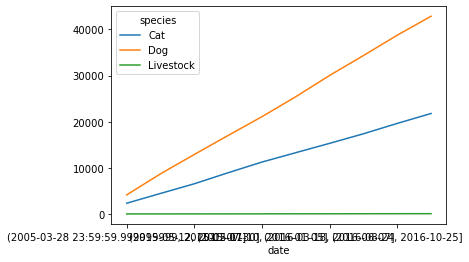

In [51]:
gg2.plot()

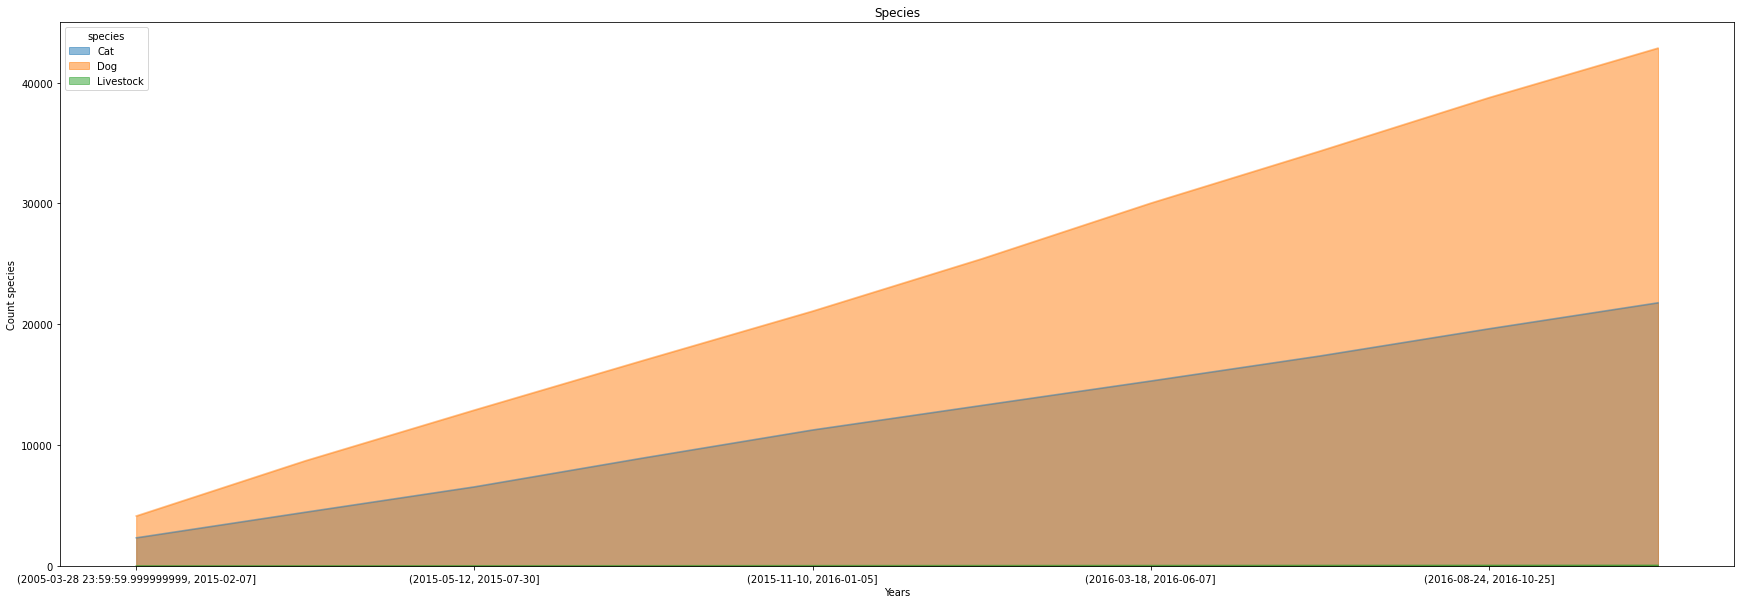

In [49]:
gg2.plot(kind='area', stacked=False, figsize=(30, 10))
plt.title('Species')
plt.ylabel('Count species')
plt.xlabel('Years')
plt.show()




In [387]:
data.groupby(['primary_breed'])['license_issue_date'].count()

primary_breed
Abyssinian                                     58
Affenpinscher                                   8
Afghan Hound                                   15
Akbash                                          3
Akita                                          74
                                             ... 
Welsh Corgi, Cardigan                         270
Welsh Corgi, Pembroke                         372
Whippet                                       117
White Swiss Shepherd (Berger Blanc Suisse)      3
Xoloitzcuintli                                795
Name: license_issue_date, Length: 323, dtype: int64